# Gleitendes Zwei-Massen-System
Es wird die Aufgabe 4.1 aus Klepp: "Analytische Methoden" (Teil c) behandelt. Dieses Dokument betrachtet den Fall mit zwei Freiheitsgraden. Tatsächlich hat das betrachtete System nur einen Freiheitsgrad, deshalb muss auch eine Bindungsgleichung angegeben werden. Es werden die Bewegungsgleichungen hergeleitet und diese anschließend linearisiert. Beides erfolgt symbolisch. 

## Systembeschreibung
Das System besteht aus zwei Massen m<sub>1</sub> und m<sub>2</sub>, die jeweils parallel zu einer der Koordinatenachsen gleiten können. Ihre Mittelpunkte sind durch eine masselose starre Stange der Länge l verbunden. Die Masse m<sub>1</sub> ist mit einer Feder verbunden, die parallel zur Bewegungsrichtung wirkt. Zusätzlich wirken Gewichtskräfte (in negativer y-Richtung). Als unabhängige Freiheitsgrade sind die jeweiligen Positionskoordinaten der Massen gewählt, und zwar ist q1 die x-Posionen der Masse m<sub>1</sub> und q2 die y-Position der Masse m<sub>2</sub>.

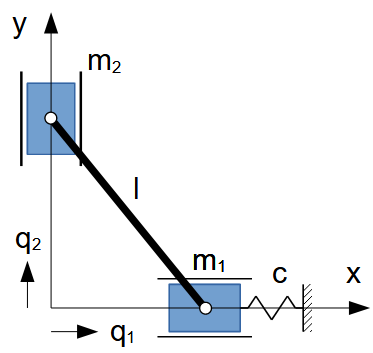
Bild 1: Systemskizze

## Aufstellen der Bewegungsgleichung
Zunächst werden die Variablen und Parameter definiert. Der Positionswinkel wird mit q bezeichnet.

In [1]:
from sympy import symbols, Matrix
from sympy.physics.mechanics import *

Vector.simplify = True
Matrix.simplify = True

q1, q2 = dynamicsymbols('q1 q2')
q1d, q2d = dynamicsymbols('q1 q2', 1)
q1dd, q2dd = dynamicsymbols('q1 q2', 2)
l, m1, m2, g, c = symbols('l m1 m2 g c')

Dann werden Bezugspunkte definiert:
- O ist ein feststehender Punkt (Geschwindigkeit wird explizit null gesetzt)
- P1 ist der Mittelpunkt der Masse m<sub>1
- P2 ist der Mittelpunkt der Masse m<sub>2

In [2]:
N = ReferenceFrame('N')

O = Point('O')
P1 = O.locatenew('P1', q1 * N.x)
P2 = O.locatenew('P2', q2 * N.y)

O.set_vel(N, 0)
P1.set_vel(N, q1d * N.x)
P2.set_vel(N, q2d * N.y)

Anschließend werden die beiden Massen definiert.

In [3]:
ParM1 = Particle('ParM1', P1, m1)
ParM2 = Particle('ParM1', P2, m2)

In [4]:
ParM1.potential_energy = 0.5 * c * q1*q1
ParM2.potential_energy = m2 * g * q2

Mit diesen Definitionen kann die Lagrange-Gleichung bestimmt werden. Die holonome Bindungsgleichung, das ist die Abhängigkeit der beiden Koordinaten untereinander, wird mit Hilfe des Satzes des Pythagoras beschrieben. Die Ausgabe erfolgt als herkömmliche Bewegungsgleichung sowie in Zustandsraumdarstellung.

In [5]:
L = Lagrangian(N, ParM1, ParM2)

hol_coneqs = [q1*q1+q2*q2-l*l]

lm = LagrangesMethod(L, [q1, q2], bodies=[ParM1, ParM2], hol_coneqs=hol_coneqs)
lm.form_lagranges_equations()

print('equations:')
vprint(lm.form_lagranges_equations())
print('mass matrix:')
vprint(lm.mass_matrix_full)
print('force matrix:')
vprint(lm.forcing_full)
print('mass matrix:')
vprint(lm.mass_matrix)
print('force matrix:')
vprint(lm.forcing)

equations:
Matrix([
[1.0*c*q1 + m1*q1'' + 2*lam1*q1],
[    g*m2 + m2*q2'' + 2*lam1*q2]])
mass matrix:
Matrix([
[1, 0,    0,    0,     0],
[0, 1,    0,    0,     0],
[0, 0,   m1,    0, -2*q1],
[0, 0,    0,   m2, -2*q2],
[0, 0, 2*q1, 2*q2,     0]])
force matrix:
Matrix([
[                 q1'],
[                 q2'],
[           -1.0*c*q1],
[               -g*m2],
[-2*q1'**2 - 2*q2'**2]])
mass matrix:
Matrix([
[m1,  0, -2*q1],
[ 0, m2, -2*q2]])
force matrix:
Matrix([
[-1.0*c*q1],
[    -g*m2]])


Die beiden Bewegungsgleichungen (Matrix mit Gleichungen) enthalten die Bindungsgleichung in Differentialform (partielle Ableitungen nach den q<sub>i</sub> mal lam1). Die Bindungsgleichung muss bei der Berechnung der Lösung zusätzlich miteinbezogen werden. Dies folgt im Prinzip aus der nichtlinearen Optimierungsrechnung mit Nebenbedingungen. In der Zustandsraumdarstellung ist dagegen die Bindungsgleichung zweimal nach der Zeit abgeleitet und diese Form in den Matrizen enthalten (5. Zeilen der vollen Matrizen).

## Linearisierung
Hier wird zweimal linearisiert, wobei jeweils eine der Positionskoordinaten als unabhängige Variable verwendet wird. 
Im ersten Fall ist q1 die unabhängige Variable. Der Linearisierungs-Punkt ist q1=0, dann ist q2=l.

In [6]:
# linearization with q1 as independent variable
lm_lin1 = lm.to_linearizer(q_ind=[q1], qd_ind=[q1d], q_dep=[q2], qd_dep=[q2d])

# linearization about q1=0 & q2=l
op_point = {q1: 0, q1d: 0, q2: l, q2d: 0}

M1, A1, B1 = lm_lin1.linearize(op_point=op_point)

print(' ')
print('q1 is independent')
print('linear mass matrix:')
vprint(M1)
print('linear force matrix:')             
vprint(A1)
print('linear matrix B:')  
vprint(B1)

 
q1 is independent
linear mass matrix:
Matrix([
[1, 0,  0,   0,   0],
[0, 1,  0,   0,   0],
[0, 0,  0, 2*l,   0],
[0, 0, m1,   0,   0],
[0, 0,  0,  m2, 2*l]])
linear force matrix:
Matrix([
[              0, 1],
[              0, 0],
[        -2*q1'', 0],
[-1.0*c - 2*lam1, 0],
[              0, 0]])
linear matrix B:
Matrix(0, 0, [])


Im zweiten Fall ist q2 die unabhängige Variable. Im Linearisierungspunkt darf q1 jedoch nicht null gesetzt werden, um eine Division durch null zu verhindern. Die Koordinaten werden deshalb formal gleich den Richtungsanteilen der Stablänge gesetzt, um ein formales Ergebnis zu erhalten.

In [7]:
# linearization with q2 as independent variable
lm_lin2 = lm.to_linearizer(q_ind=[q2], qd_ind=[q2d], q_dep=[q1], qd_dep=[q1d])

# linearization about q1=lx & q2=ly
# note: linearization at q1=0 and q2=l gives a spurious result here (due to division by zero)
lx, ly = symbols('lx ly')
op_point2 = {q1: lx, q1d: 0, q2: ly, q2d: 0}

M2, A2, B2 = lm_lin2.linearize(op_point=op_point2)

print(' ')
print('q2 is independent')
print('linear mass matrix:')
vprint(M2)
print('linear force matrix:')             
vprint(A2)
print('linear matrix B:')  
vprint(B2)

 
q2 is independent
linear mass matrix:
Matrix([
[1, 0,    0,    0,    0],
[0, 1,    0,    0,    0],
[0, 0, 2*lx, 2*ly,    0],
[0, 0,   m1,    0, 2*lx],
[0, 0,    0,   m2, 2*ly]])
linear force matrix:
Matrix([
[                       0, -ly/lx],
[                       0,      1],
[  -2*q2'' + 2*ly*q1''/lx,      0],
[-ly*(-1.0*c - 2*lam1)/lx,      0],
[                 -2*lam1,      0]])
linear matrix B:
Matrix(0, 0, [])
